In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
portfolio = data.DataReader(['GOOG', 'FB','AAPL','AMZN','NFLX'], 'yahoo', start='2022/01/01', end='2022/04/30')
portfolio.head()

Attributes    Adj Close                                                   \
Symbols            GOOG          FB        AAPL         AMZN        NFLX   
Date                                                                       
2022-01-03  2901.489990  338.540009  181.511703  3408.090088  597.369995   
2022-01-04  2888.330078  336.529999  179.208038  3350.439941  591.150024   
2022-01-05  2753.070068  324.170013  174.441132  3287.139893  567.520020   
2022-01-06  2751.020020  332.459991  171.529114  3265.080078  553.289978   
2022-01-07  2740.090088  331.790009  171.698654  3251.080078  541.059998   

Attributes        Close                                                   ...  \
Symbols            GOOG          FB        AAPL         AMZN        NFLX  ...   
Date                                                                      ...   
2022-01-03  2901.489990  338.540009  182.009995  3408.090088  597.369995  ...   
2022-01-04  2888.330078  336.529999  179.699997  3350.439941  591.150024  ...   
2022-01-05  2753.070068  324.170013  174.919998  3287.139893  567.520020  ...   
2022-01-06  2751.020020  332.459991  172.000000  3265.080078  553.289978  ...   
2022-01-07  2740.090088  331.790009  172.169998  3251.080078  541.059998  ...   

Attributes         Open                                                   \
Symbols            GOOG          FB        AAPL         AMZN        NFLX   
Date                                                                       
2022-01-03  2889.510010  338.299988  177.830002  3351.000000  605.609985   
2022-01-04  2911.010010  339.950012  182.630005  3408.760010  599.909973   
2022-01-05  2883.620117  333.019989  179.610001  3337.659912  592.000000   
2022-01-06  2749.949951  322.820007  172.699997  3269.010010  554.340027   
2022-01-07  2758.100098  332.739990  172.889999  3276.780029  549.460022   

Attributes     Volume                                                 
Symbols          GOOG          FB         AAPL       AMZN       NFLX  
Date                                                                  
2022-01-03  1260700.0  14537900.0  104487900.0  3176000.0  3067500.0  
2022-01-04  1146400.0  15998000.0   99310400.0  3536300.0  4393100.0  
2022-01-05  2482100.0  20564500.0   94537600.0  3215100.0  4148700.0  
2022-01-06  1452500.0  27962800.0   96904000.0  2597900.0  5711800.0  
2022-01-07   970400.0  14722000.0   86709100.0  2330300.0  3382900.0  

[5 rows x 30 columns]

In [4]:
# Closing price
port_close = portfolio['Adj Close']
port_close.head()

Symbols,GOOG,FB,AAPL,AMZN,NFLX
Date,,,,,
2022-01-03,2901.489990,338.540009,181.511703,3408.090088,597.369995
2022-01-04,2888.330078,336.529999,179.208038,3350.439941,591.150024
2022-01-05,2753.070068,324.170013,174.441132,3287.139893,567.520020
2022-01-06,2751.020020,332.459991,171.529114,3265.080078,553.289978
2022-01-07,2740.090088,331.790009,171.698654,3251.080078,541.059998


In [5]:
# log returns for covariance and correlation calculation
google = port_close['GOOG'].pct_change().apply(lambda x: np.log(1+x))
google.head()


Date
2022-01-03         NaN
2022-01-04   -0.004546
2022-01-05   -0.047962
2022-01-06   -0.000745
2022-01-07   -0.003981
Name: GOOG, dtype: float64

In [6]:
# Volatility
var_google = google.var()
np.sqrt(var_google * 250)

0.3651138868902799

In [7]:
FB = port_close['FB'].pct_change().apply(lambda x: np.log(1+x))
FB.head()

Date
2022-01-03         NaN
2022-01-04   -0.005955
2022-01-05   -0.037419
2022-01-06    0.025251
2022-01-07   -0.002017
Name: FB, dtype: float64

In [8]:
var_FB = FB.var()
np.sqrt(var_FB * 250)

0.7529022468622237

In [9]:
apple = port_close['AAPL'].pct_change().apply(lambda x: np.log(1+x))
apple.head()

Date
2022-01-03         NaN
2022-01-04   -0.012773
2022-01-05   -0.026960
2022-01-06   -0.016834
2022-01-07    0.000988
Name: AAPL, dtype: float64

In [10]:
var_apple = apple.var()
np.sqrt(var_apple * 250)

0.30844172455193863

In [11]:
amazon = port_close['AMZN'].pct_change().apply(lambda x: np.log(1+x))
amazon.head()

Date
2022-01-03         NaN
2022-01-04   -0.017060
2022-01-05   -0.019074
2022-01-06   -0.006734
2022-01-07   -0.004297
Name: AMZN, dtype: float64

In [12]:
var_amazon = amazon.var()
np.sqrt(var_amazon * 250)

0.5333709312766071

In [13]:
netflix = port_close['NFLX'].pct_change().apply(lambda x: np.log(1+x))
netflix.head()

Date
2022-01-03         NaN
2022-01-04   -0.010467
2022-01-05   -0.040794
2022-01-06   -0.025394
2022-01-07   -0.022352
Name: NFLX, dtype: float64

In [14]:
var_netflix = netflix.var()
np.sqrt(var_netflix * 250)

0.9975451195240191

In [15]:
# Log of Percentage change
log_pct = port_close.pct_change().apply(lambda x: np.log(1+x))
log_pct.head()

Symbols,GOOG,FB,AAPL,AMZN,NFLX
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.004546,-0.005955,-0.012773,-0.017060,-0.010467
2022-01-05,-0.047962,-0.037419,-0.026960,-0.019074,-0.040794
2022-01-06,-0.000745,0.025251,-0.016834,-0.006734,-0.025394
2022-01-07,-0.003981,-0.002017,0.000988,-0.004297,-0.022352


In [16]:
import seaborn as sns

log_pct1 = log_pct.iloc[1: , :]

# small covariance everywhere
cov_matrix = log_pct1.cov()
cov_matrix


Symbols,GOOG,FB,AAPL,AMZN,NFLX
Symbols,,,,,
GOOG,0.000533,0.000698,0.000349,0.000500,0.000579
FB,0.000698,0.002267,0.000494,0.000906,0.001397
AAPL,0.000349,0.000494,0.000381,0.000414,0.000420
AMZN,0.000500,0.000906,0.000414,0.001138,0.000960
NFLX,0.000579,0.001397,0.000420,0.000960,0.003980


In [17]:
log_pct1.corr()
# correlation is positive for all the stocks with positive covariation

Symbols,GOOG,FB,AAPL,AMZN,NFLX
Symbols,,,,,
GOOG,1.000000,0.634628,0.775024,0.641676,0.397163
FB,0.634628,1.000000,0.532107,0.563885,0.465179
AAPL,0.775024,0.532107,1.000000,0.628483,0.340871
AMZN,0.641676,0.563885,0.628483,1.000000,0.451103
NFLX,0.397163,0.465179,0.340871,0.451103,1.000000


In [18]:
# Define weights for allocation of expected returns
w = [0.2, 0.2, 0.2, 0.2, 0.2]
expected_return = ((log_pct1.mean())*w).sum()
expected_return

-0.0058228168898762835

# EFFICIENT FRONTIER

In [19]:

ind_er = port_close.resample('M').last().pct_change().mean()
ind_er

Symbols
GOOG   -0.049141
FB     -0.123699
AAPL   -0.031241
AMZN   -0.049805
NFLX   -0.206234
dtype: float64

In [20]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = port_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
GOOG    0.365114
FB      0.752902
AAPL    0.308442
AMZN    0.533371
NFLX    0.997545
dtype: float64

In [21]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOG,-0.049141,0.365114
FB,-0.123699,0.752902
AAPL,-0.031241,0.308442
AMZN,-0.049805,0.533371
NFLX,-0.206234,0.997545


In [22]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(port_close.columns)
num_portfolios = 10000

In [23]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [24]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(port_close.columns.tolist()):
    print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

0 GOOG
1 FB
2 AAPL
3 AMZN
4 NFLX


In [25]:
portfolios  = pd.DataFrame(data)

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

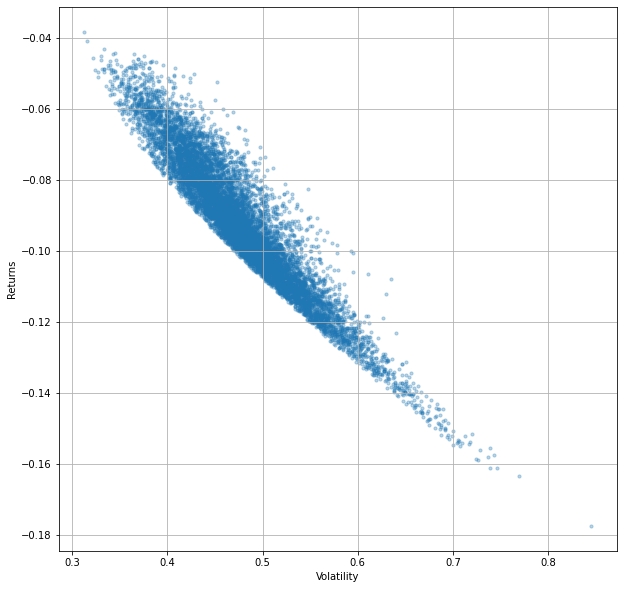

In [26]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [27]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       -0.052216
Volatility     0.452521
GOOG weight    0.264545
FB weight      0.036831
AAPL weight    0.019334
AMZN weight    0.677860
NFLX weight    0.001430
Name: 2467, dtype: float64

In [28]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns       -0.038166
Volatility     0.312606
GOOG weight    0.287797
FB weight      0.011362
AAPL weight    0.663748
AMZN weight    0.036871
NFLX weight    0.000222
Name: 3679, dtype: float64

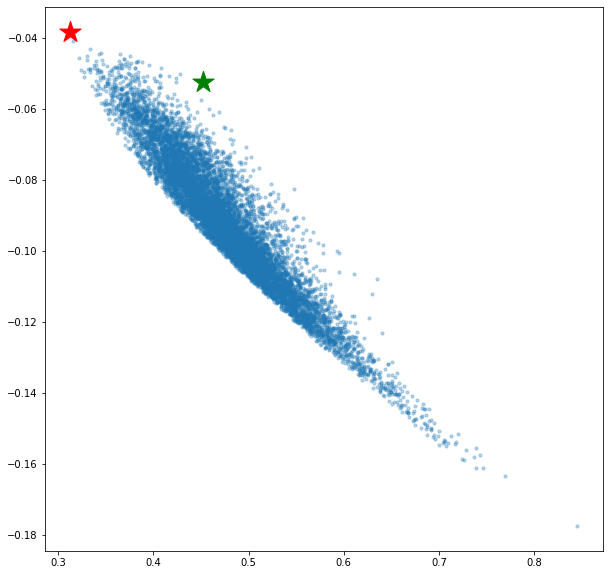

In [29]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)